In [92]:
%matplotlib inline
import numpy as np, scipy, matplotlib.pyplot as plt, sklearn, IPython.display as ipd
import librosa, librosa.display
import warnings
warnings.simplefilter("ignore")

Next steps:\
- add dictionary for notes with a range
- convert to staff notation
- estimate tempo

In [93]:
x, sr = librosa.load("../../data/grandpiano.wav",duration=10)

In [94]:
ipd.Audio(x,rate=sr)

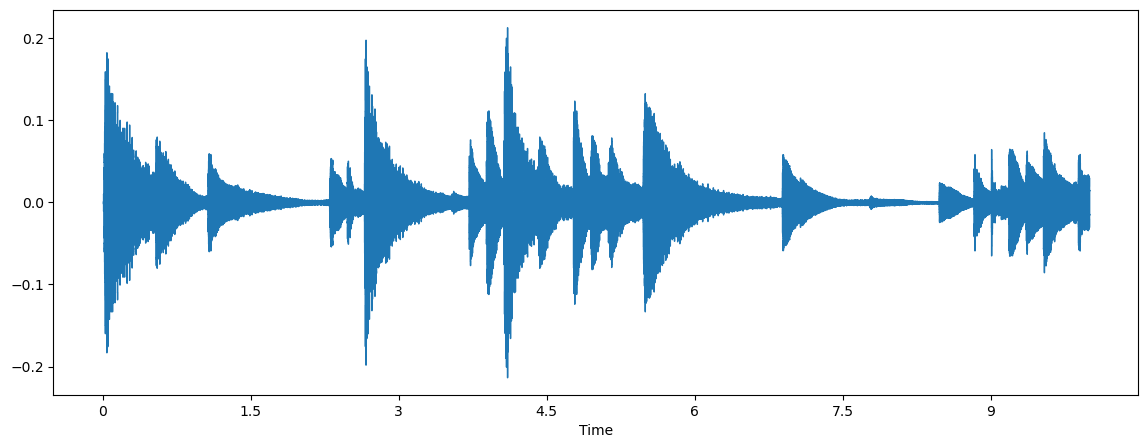

In [95]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x,sr)

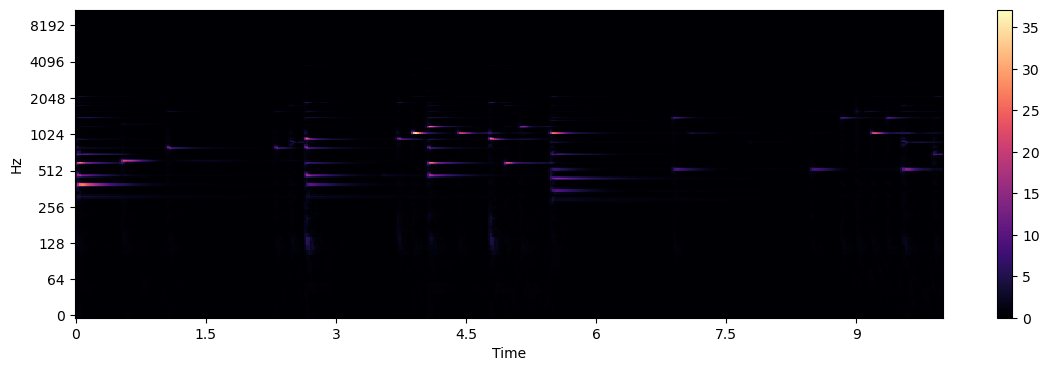

In [96]:
S = librosa.stft(x)
S_db = librosa.amplitude_to_db(abs(S))
plt.figure(figsize=(14, 4))
librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [97]:
X, X_phase = librosa.magphase(S)
onsets = librosa.onset.onset_detect(y=x, sr=sr, units='time')
n_components = len(onsets)
W, H = librosa.decompose.decompose(X,n_components=n_components, sort=True)

In [98]:
S.shape
x.shape
H[1].shape

(431,)

W contains information about the frequencies\
H contains information about temporal properties.

311.9268292682927
387.219512195122
441.0
441.0
462.5121951219512
484.0243902439024
527.0487804878048
591.5853658536586
623.8536585365854
699.1463414634146
731.4146341463414
785.1951219512196
806.7073170731708
882.0
892.7560975609756
935.780487804878
946.5365853658536
946.5365853658536
1043.341463414634
1064.8536585365853
1172.4146341463415
1193.9268292682927
1398.2926829268292
1419.8048780487804
1570.3902439024391


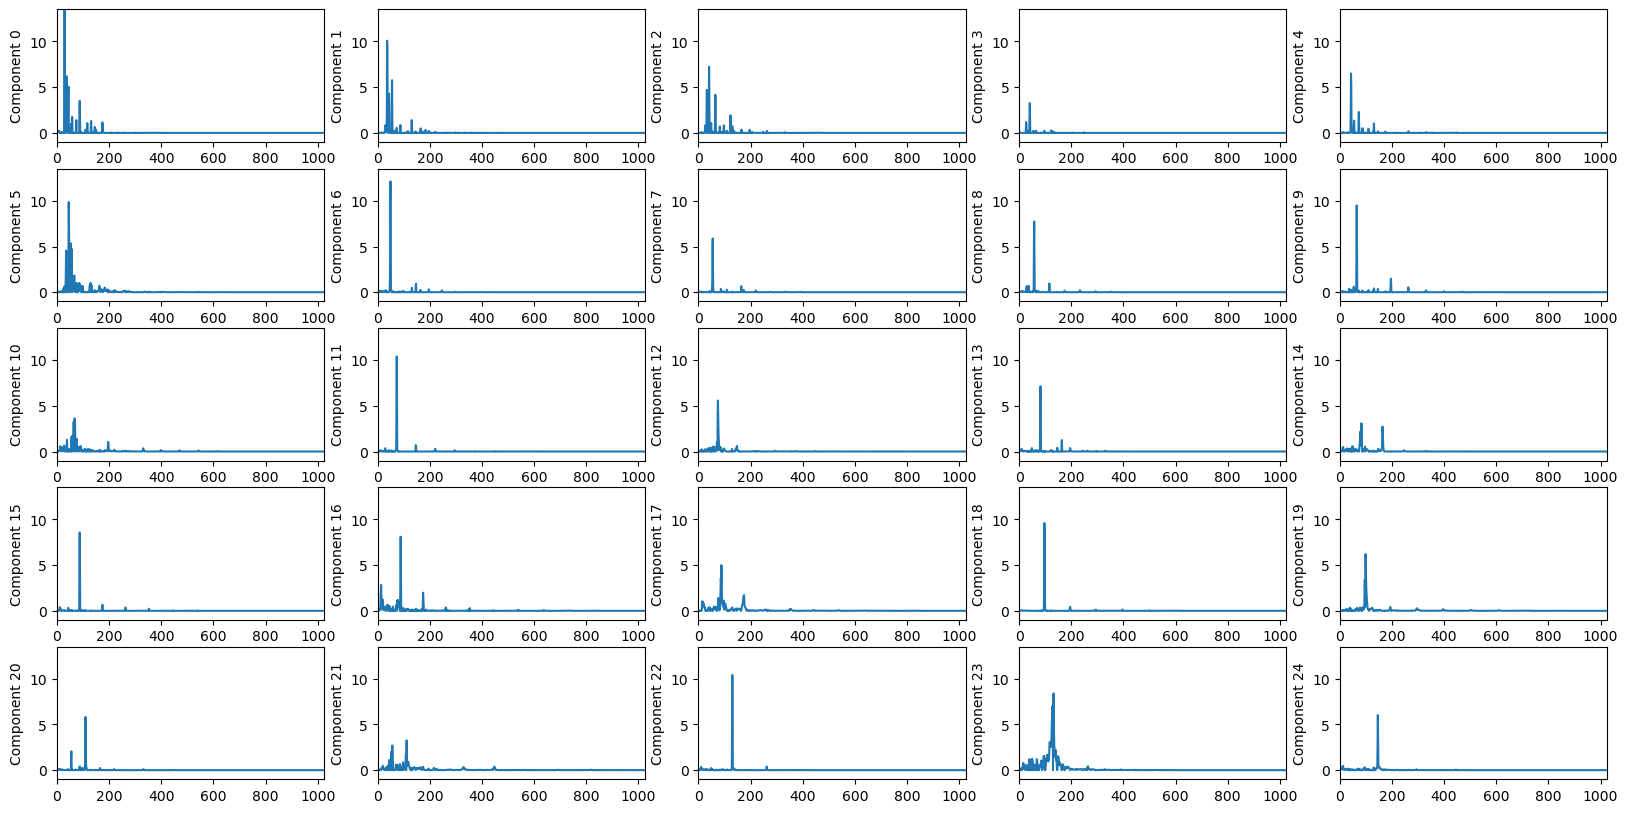

In [99]:
plt.figure(figsize=(20, 10))
for n in range(n_components):
    plt.subplot(5, 5, n+1)
    plt.plot(W[:,n])
    plt.ylim(-1, W.max())
    plt.xlim(0, W.shape[0])
    plt.ylabel('Component %d' % n)
    print(np.argmax(W[:,n]) * 11025/1025)

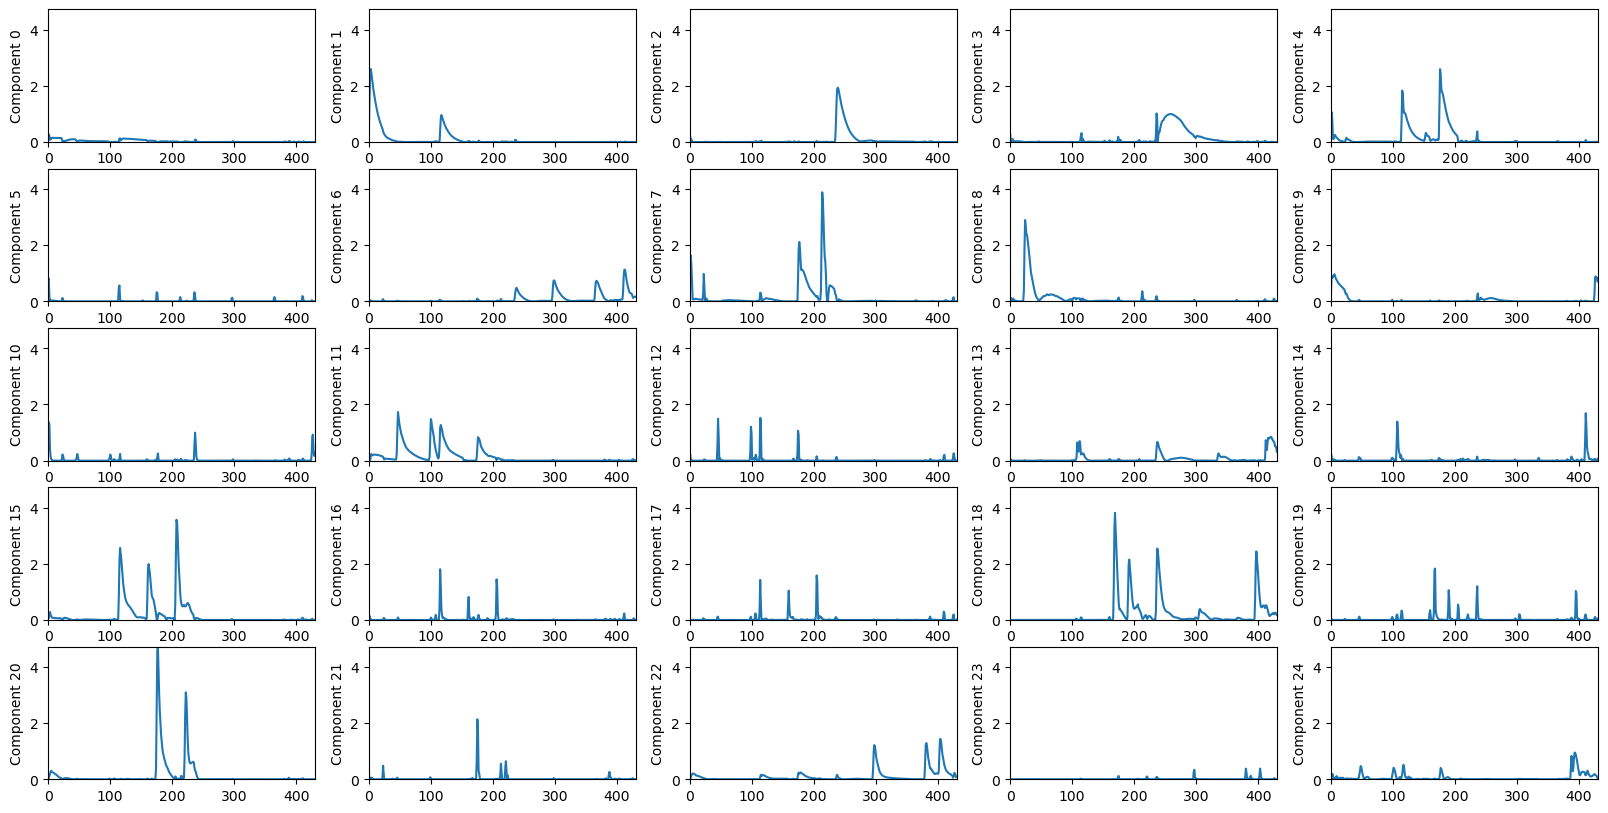

In [100]:
plt.figure(figsize=(20, 10))
for n in range(n_components):
    plt.subplot(5, 5, n+1)
    plt.plot(H[n])
    plt.ylim(0, H.max())
    plt.xlim(0, H.shape[1])
    plt.ylabel('Component %d' % n)

In [101]:
for n in range(n_components):
    spectral = W[:,n]
    temporal = H[n]
    onsets = librosa.util.peak_pick(temporal,pre_max = 6, post_max=6,pre_avg=50, post_avg=50,delta=temporal.max()/2,wait=0)

    print(np.argmax(spectral) * 11025/1025)  #can detect half the sampling frequency
    print(onsets * 10/431)

311.9268292682927
[0.02320186]
387.219512195122
[0.06960557]
441.0
[5.54524362]
441.0
[5.47563805 6.00928074]
462.5121951219512
[2.66821346 4.08352668]
484.0243902439024
[0.02320186 2.66821346]
527.0487804878048
[6.93735499 8.51508121 9.58236659]
591.5853658536586
[4.96519722]
623.8536585365854
[0.55684455]
699.1463414634146
[0.13921114 9.90719258]
731.4146341463414
[0.02320186 5.49883991 9.90719258]
785.1951219512196
[1.09048724 2.32018561 2.69141531]
806.7073170731708
[1.06728538 2.29698376 2.6450116  4.06032483]
882.0
[2.59860789 5.49883991 9.74477958]
892.7560975609756
[2.48259861 9.53596288]
935.780487804878
[2.69141531 4.80278422]
946.5365853658536
[2.66821346 4.77958237]
946.5365853658536
[2.6450116  3.71229698 4.75638051]
1043.341463414634
[3.92111369 5.49883991 9.21113689]
1064.8536585365853
[3.89791183 4.40835267 5.47563805 9.16473318]
1172.4146341463415
[4.10672854 5.15081206]
1193.9268292682927
[4.06032483]
1398.2926829268292
[6.91415313 8.86310905 9.37354988]
1419.80487804